# Market Basket Analysis Using Apriori and FP-Growth Algorithm

Market Basket Analysis is a technique used by the companies to find out the association between the different products sold at their outlets and then leverage that information to increase their sales and profits. 

By using these algorithms, companies can identify the items that are sold and bought together to increase the companies profit and customers satisfaction. 

## Importing Required Libraries

In [1]:
#Data manipulation libraries
import pandas as pd
import numpy as np

#Libraries required for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import squarify
import matplotlib

#Libraries required for market basket analysis (using apriori)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#for preprocessing
from mlxtend.preprocessing import TransactionEncoder
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Exploration & Data Cleaning

Helps to identify key characteristics, provides better insights of data and helps to identify and replace missing values along with outliers.

In [2]:
#Reading a csv file
itemset = pd.read_csv(r'C:\Users\nikit\Downloads\Market_basket_data.csv', header = None)

#Checking the size of the data
itemset.shape

#Head of the data
itemset.head()

(7502, 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
2,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# TransactionEncoder()


Here, for the pre-processing we used mlxtend TransactionEncoder() function. It is the Encoder class for transaction data in Python list. It finds out what are all the different products in the transactions and will assign each transaction a list which contains a boolean array where each index represnts the corresponding product whether purchased in the transaction or not using True or False. And, It returns the one-hot encoded boolean array of the input transactions. 


In [3]:
#converting into required format of TransactionEncoder()
trans=[]
for i in range(0,7501):
    trans.append([str(itemset.values[i,j]) for j in range(0,20)])

trans=np.array(trans)

print(trans.shape)

(7501, 20)


In [4]:
# Using TransactionEncoder

t=TransactionEncoder()
itemset=t.fit_transform(trans)
itemset=pd.DataFrame(itemset,columns=t.columns_,dtype=int)

itemset.shape

(7501, 140)

In [5]:
#Here we dropped nan as one of the columns 

itemset.drop('nan',axis=1,inplace=True)

In [6]:
#Checking for the shape of the data
itemset.shape

#Varification for the column nan
'nan' in itemset.columns


(7501, 139)

False

In [7]:
itemset.head()

,0,1,10,11,12,13,14,15,16,17,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Visualization of frequently purchased top 20 items

It helps to identify most popular 20 items.

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'mineral water'),
 Text(1, 0, 'eggs'),
 Text(2, 0, 'spaghetti'),
 Text(3, 0, 'french fries'),
 Text(4, 0, 'chocolate'),
 Text(5, 0, 'green tea'),
 Text(6, 0, 'milk'),
 Text(7, 0, 'ground beef'),
 Text(8, 0, 'frozen vegetables'),
 Text(9, 0, 'pancakes'),
 Text(10, 0, 'burgers'),
 Text(11, 0, 'cake'),
 Text(12, 0, 'cookies'),
 Text(13, 0, 'escalope'),
 Text(14, 0, 'low fat yogurt'),
 Text(15, 0, 'shrimp'),
 Text(16, 0, 'tomatoes'),
 Text(17, 0, 'olive oil'),
 Text(18, 0, 'frozen smoothie'),
 Text(19, 0, 'turkey')]

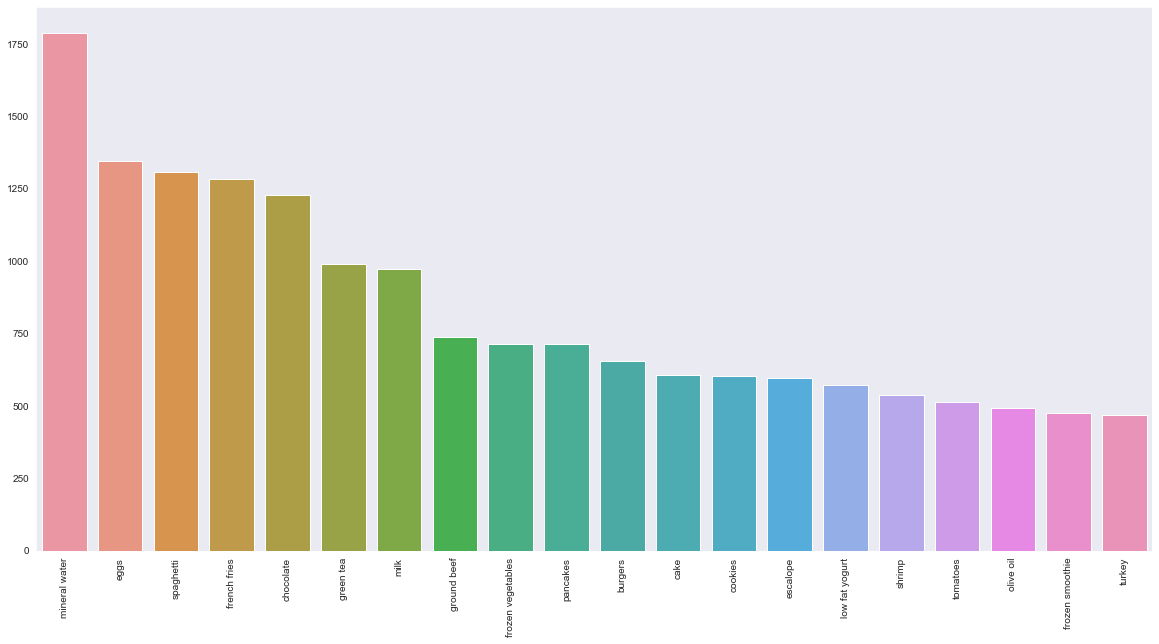

In [8]:
#Here, we tried to find out top 20 items purchased freequently
r=itemset.sum(axis=0).sort_values(ascending=False)[:20]

#adjusting the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

This Bar graph shows top 20 items bought by the customers. It shows that Mineral water,Eggs,Spaghetti,french fries and Chocolates are top 5 items of them. 

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Top 20 frequently purchased items')

(0.0, 100.0, 0.0, 100.0)

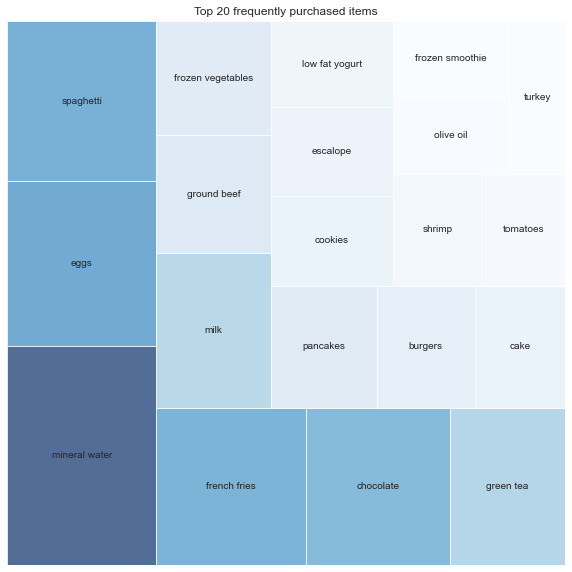

In [25]:
my_values=r.values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]


#Treemap diagram of top 20 frequently purchased items
plt.figure(figsize=(10,10))
squarify.plot(sizes=r.values, label=r.index, alpha=.7,color=colors)
plt.title("Top 20 frequently purchased items")
plt.axis('off')

# Apriori Algorithm

The Apriori algorithm generates the most relevant set of rules from a given transaction data. It also shows the support, confidence and lift of those rules. These three measures can be used to decide the relative strength of the rules. 

In [10]:
#List of items and ietmsets with atleast 5% support:
freq_items=apriori(itemset,min_support=0.05,use_colnames=True)

freq_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179576,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063192,(frozen smoothie)


In [11]:
#Generating association rules
res=association_rules(freq_items,metric="lift",min_threshold=1.3)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314


In [12]:
frequent_itemsets = apriori(itemset, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179576,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063192,(frozen smoothie),1


In [22]:
#List of item sets with length = 2 and support more than 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
25,0.052660,"(mineral water, chocolate)",2
26,0.050927,"(mineral water, eggs)",2
27,0.059725,"(mineral water, spaghetti)",2


In [14]:
#List of item sets with length = 1 and support more than 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179576,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063192,(frozen smoothie),1


# FP-Growth Algorithm

This algorithm is an improvement to the Apriori method. FP growth algorithm represents the database in the form of a tree called a frequent pattern tree or FP tree.This tree structure maintains the association between the itemsets. 

The database is fragmented using one frequent item. This fragmented part is called “pattern fragment”. The itemsets of these fragmented patterns are analyzed. Thus with this method, the search for frequent itemsets is reduced comparatively.

In [15]:
#Importing required Libraries

from mlxtend.frequent_patterns import fpgrowth

In [16]:
#Formulating and running the fpgrowth algorithm
res=fpgrowth(itemset,min_support=0.05,use_colnames=True)
res

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076390,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063192,(frozen smoothie)
6,0.179576,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [17]:
res=association_rules(res,metric="lift",min_threshold=1)

res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(eggs),0.238368,0.179576,0.050927,0.213647,1.189727,0.008121,1.043327
1,(eggs),(mineral water),0.179576,0.238368,0.050927,0.283593,1.189727,0.008121,1.063127
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357


# Apriori vs FP-Growth

Here, we compared both the approaches. we compared Apriori algorithm and FP-Growth algorithm with respect to Run time and Minimum level support. 

In [18]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(itemset,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, mineral water, ground beef)"
253,0.017064,"(mineral water, ground beef, spaghetti)"
254,0.015731,"(milk, mineral water, spaghetti)"
255,0.010265,"(olive oil, mineral water, spaghetti)"


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(mineral water, whole wheat rice)"
99,0.022930,"(olive oil, spaghetti)"
100,0.025197,"(pancakes, spaghetti)"
101,0.021197,"(spaghetti, shrimp)"


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179576,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179576,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063192,(frozen smoothie)


In [19]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(itemset,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076390,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
252,0.011465,"(cake, burgers)"
253,0.014131,"(cake, green tea)"
254,0.010265,"(cake, frozen vegetables)"
255,0.011865,"(pancakes, cake)"


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076390,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
98,0.040928,"(mineral water, ground beef)"
99,0.039195,"(spaghetti, ground beef)"
100,0.021997,"(milk, ground beef)"
101,0.023064,"(ground beef, chocolate)"


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076390,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063192,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.033329,(avocado)
9,0.031862,(cottage cheese)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076390,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063192,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.179576,(eggs)
9,0.087188,(burgers)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076390,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063192,(frozen smoothie)
6,0.179576,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

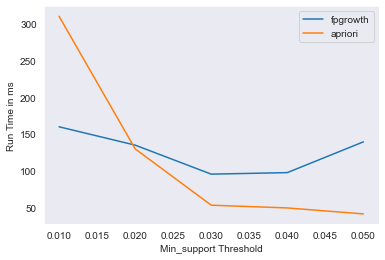

In [20]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

This graph shows that, for the low level of support Apriori algorithm requires more time as compared to FP-Growth algorithm. Whereas FP-Growth algorithm shows the consistent performance over the support threshold level. 